# ROOT Basic Tools: histograms and graphs

# 🧱 ROOT histograms

[Histogram class documentation](https://root.cern.ch/doc/master/classTH1.html)

ROOT has powerful histogram objects that, among other features, let you produce complex plots and perform fits of arbitrary functions.

Below is an example histogram that can be obtained using one of our tutorials: [Higgs to Four Leptons](https://root.cern/doc/master/df106__HiggsToFourLeptons_8py.html). 

`TH1D` is a 1D histogram with floating point double precision y-axis, `TH2I` is a 2D histogram with Integer y-axis, etc.

<center><img src="../../images/examplehist_df106_HiggsToFourLeptons.png"><center>

## 🪆 Creating and filling a histogram

To have something to play with, let's quickly fill a histogram with 5000 normally distributed values:

In [1]:
import ROOT
import numpy as n

/opt/homebrew/Cellar/root/6.38.00/lib/root/cppyy/__init__.py:374: UserWarning: CPyCppyy API not found (tried: /Users/chanayo/.pyenv/versions/3.14.0/include/site/python3.14); set CPPYY_API_PATH envar to the 'CPyCppyy' API directory to fix
  warnings.warn("CPyCppyy API not found (tried: %s); "


In [2]:
h1d_gaus = ROOT.TH1D(name="h1d_gaus", title="My histo", nbinsx=100, xlow=-5, xup=5)
h1d_gaus.FillRandom("gaus", ntimes=5000)

You can find the full list of supported expressions [here](https://root.cern/doc/master/classTFormula.html).
To check the full documentation you can always refer to https://root.cern/doc/master (and then switch to the documentation for your particular ROOT version with the drop-down menu at the top of the page).

## 📊 Drawing a histogram

[Drawing options documentation](https://root.cern.ch/doc/master/classTHistPainter.html)

The link above contains the documentation for the histogram drawing options.

In a notebook, we want to use the `%jsroot on` magic and explicitly draw a `TCanvas`.

In [3]:
%jsroot on
c = ROOT.TCanvas()
#h1d_gaus.SetLineColor(ROOT.kBlue)
#h1d_gaus.SetFillColor(ROOT.kBlue)
#h1d_gaus.GetXaxis().SetTitle("value")
#h1d_gaus.GetYaxis().SetTitle("count")
#h1d_gaus.SetTitle("My histo with latex: p_{t}, #eta, #phi")
h1d_gaus.Draw() # draw the histogram on the canvas
c.Draw() # draw the canvas on the screen

## 🧩 The Unified Histogram Interface (UHI)

ROOT histograms now implement the **[Unified Histogram Interface (UHI)](https://uhi.readthedocs.io/en/latest/)**, which provides a **Pythonic interface** for working with histograms.  

Think of it as an **interface layer**: it doesn’t change the underlying ROOT histogram implementation, but it allows you to manipulate histograms using **NumPy-like syntax**, slice them, and integrate more naturally with Python plotting tools such as [`mplhep`](https://mplhep.readthedocs.io/en/latest/).

More details and examples can be found in the [UHI documentation](https://uhi.readthedocs.io/en/latest/) and [ROOT UHI reference](https://root.cern.ch/doc/master/group__uhi__docs.html).

> **Note:** For the following cells, **ROOT ≥ 6.36** is required.  
> If you encounter errors, check your ROOT version. If it is lower than 6.36, you can skip these cells and continue with the ROOT functions section.


To quickly try it out, let's set the content of a `TH1D` and plot it:

In [10]:
from ROOT.uhi import overflow, underflow
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

In [8]:
# There is a difference between filling and setting a histogram
h_fill_set = ROOT.TH1D("h", "Fill vs SetBinContent", 3, 0, 3)

# Fill() -> adds data to the histogram
h_fill_set.Fill(2.5)

print("After Fill(2.5):", h_fill_set.values())

# SetBinContent() -> modifies the bin contents manually
h_fill_set.Reset()
h_fill_set.SetBinContent(1, 2.5)

print("\nAfter SetBinContent(1, 2.5):", h_fill_set.values())

After Fill(2.5): [0. 0. 1.]

After SetBinContent(1, 2.5): [2.5 0.  0. ]


In [11]:
h1d_uhi_basic = ROOT.TH1D(name="h1d_uhi_basic", title="My UHI histo", nbinsx=10, xlow=0, xup=1)

# Setting the histogram content using UHI-style indexing syntax
h1d_uhi_basic[...] = np.linspace(0, 11, 12)  # set with 0..11, including under/overflow

"""
# equivalent native ROOT-style loop for setting bin contents
values = np.linspace(0, 11, 12)
for i in range(0, h1d_uhi_basic.GetNbinsX() + 2):  # +2 to include under/overflow
    h1d_uhi_basic.SetBinContent(i, values[i])
"""

print(f"Bin contents: {h1d_uhi_basic.values()}")
print(f"Underflow: {h1d_uhi_basic[underflow]}, Overflow: {h1d_uhi_basic[overflow]}")

Bin contents: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Underflow: 0.0, Overflow: 11.0


Warning in <TROOT::Append>: Replacing existing TH1: h1d_uhi_basic (Potential memory leak).


### 💡 Hint

| **UHI Expression**     | **Equivalent ROOT Function**     | **Description**                          |
|------------------------:|:---------------------------------|:-----------------------------------------|
| `h[bin] = value`          | `h.SetBinContent(bin+1, value)` | Set the content of a specific bin           |
| `h[bin]`          | `h.GetBinContent(bin+1)`               | Access the content of a specific bin           |
| `h[underflow]`        | `h.GetBinContent(0)`                    | Access the underflow bin               |
| `h[overflow]`     | `h.GetBinContent(nbins+1)`         | Access overflow bin    |

/Users/chanayo/Library/Mobile Documents/com~apple~CloudDocs/Repository/Academia/Course-Codex/cern-root-student-course/.venv/lib/python3.14/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)


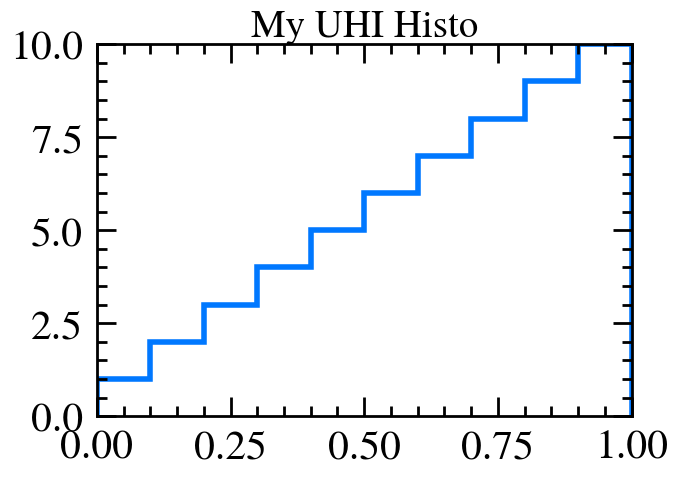

In [12]:
hep.style.use("LHCb2")  # set the style to LHCb2

plt.figure(figsize=(7,5))
hep.histplot(
    h1d_uhi_basic,
    yerr=False,
    linewidth=4,
)
plt.title("My UHI Histo")
plt.show()

**Exercise:** Using `NumPy`’s [`np.histogram`](https://numpy.org/doc/2.1/reference/generated/numpy.histogram.html#numpy-histogram), fill a histogram that matches the distribution of `h1d_gaus` above, and plot it using `mplhep`:

/Users/chanayo/Library/Mobile Documents/com~apple~CloudDocs/Repository/Academia/Course-Codex/cern-root-student-course/.venv/lib/python3.14/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)


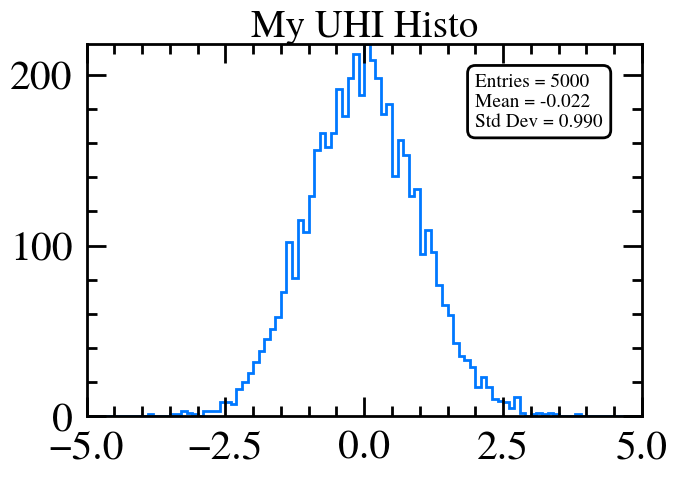

In [13]:
# Solution
h1d_uhi_gauss = ROOT.TH1D(name="h1d_uhi_gauss", title="My UHI histo", nbinsx=100, xlow=-5, xup=5)
h1d_uhi_gauss[...] = np.histogram(np.random.normal(size=5000), bins=100, range=(-5,5))[0]
# or call h1d_uhi_gauss.Fill(np.random.normal(size=5000))

entries = h1d_uhi_gauss.GetEntries()
mean = h1d_uhi_gauss.GetMean()
std = h1d_uhi_gauss.GetStdDev()

plt.figure(figsize=(7,5))
hep.histplot(h1d_uhi_gauss, linewidth=2, yerr=False)
plt.title("My UHI Histo")

stats_text = (
    f"Entries = {entries:.0f}\n"
    f"Mean = {mean:.3f}\n"
    f"Std Dev = {std:.3f}"
)

plt.text(
    2, 170, stats_text,
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white")
)

plt.show()

# 🧮 Modeling and Fitting Data

## 🎛️ ROOT functions

The type that represents an arbitrary one-dimensional mathematical function in ROOT is [TF1](https://root.cern.ch/doc/master/classTF1.html).<br>
Similarly, [TF2](https://root.cern.ch/doc/master/classTF2.html) and [TF3](https://root.cern.ch/doc/master/classTF3.html) represent 2-dimensional and 3-dimensional functions.

As an example, let's define and plot a simple surface:

In [14]:
f2 = ROOT.TF2("f2", "sin(x*x - y*y)", xmin=-2, xmax=2, ymin=-2, ymax=2)

In [15]:
c = ROOT.TCanvas()
f2.Draw("surf1") # to get a surface instead of the default contour plot
c.Draw()

## 📈 Fitting a histogram

Let's see how to perform simple histogram fits of arbitrary functions. We will need a `TF1` that represents the function we want to use for the fit.

This time we define our `TF1`. Here we define a simple gaussian with scale and mean parameters (pars[0] and pars[1] respectively):

In [16]:
def gaussian(x: np.ndarray, pars: np.ndarray) -> float:    
    return pars[0] * np.exp(-np.power(x[0] - pars[1], 2) / 2) / np.sqrt(2 * np.pi)

The function signature, that takes an array of coordinates and an array of parameters as inputs, is the generic signature of functions that can be used to construct a `TF1` object:

In [17]:
fitFunc = ROOT.TF1("fitFunc", gaussian, xmin=-5, xmax=5, npar=2)

Now we fit our `h` histogram with `fitFunc`:

In [18]:
res = h1d_gaus.Fit(fitFunc, "S") # the "S" option makes the function return a fit result object

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      57.2302
NDf                       =           67
Edm                       =  1.34911e-09
NCalls                    =           44
p0                        =      494.933   +/-   7.03982     
p1                        =    0.0173689   +/-   0.0142894   


Drawing the histogram now automatically also shows the fitted function:

In [19]:
c2 = ROOT.TCanvas()
h1d_gaus.Draw()
c2.Draw()

For the particular case of a gaussian fit, we could also have used the built-in `"gaus"` function, as we did when we called `FillRandom` (for the full list of supported expressions see [here](https://root.cern/doc/master/classTFormula.html)):

In [20]:
res = h1d_gaus.Fit("gaus", "S")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      57.2152
NDf                       =           66
Edm                       =  9.31601e-06
NCalls                    =           55
Constant                  =      197.704   +/-   3.46748     
Mean                      =    0.0172556   +/-   0.014353    
Sigma                     =      0.99873   +/-   0.0103909    	 (limited)


In [21]:
c3 = ROOT.TCanvas()
h1d_gaus.Draw()
c3.Draw()

For more complex binned and unbinned likelihood fits, check out [RooFit](https://root.cern/manual/roofit/), a powerful data modelling framework integrated in ROOT.

# 🎨 Visualizing and Combining Results

## 📉 ROOT graphs

[TGraph](https://root.cern/doc/master/classTGraph.html) is a type useful for scatter plots.

Their drawing options are documented [here](https://root.cern/doc/master/classTGraphPainter.html).

Like for histograms, the aspect of `TGraph`s can be greatly customized, they can be fitted with custom functions, etc. 

In [22]:
x = np.arange(-20, 21, dtype=float)
y = -x*x
g = ROOT.TGraph(n=x.size, x=x, y=y)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
g.SetTitle("My graph")
g.Draw()
c4.Draw()

The same graph can be displayed as a bar plot:

In [24]:
c5 = ROOT.TCanvas()
g.SetTitle("My graph")
g.SetFillColor(ROOT.kOrange + 1) # base colors can be tweaked by adding/subtracting values to them 
g.Draw("AB1")
c5.Draw()

## Plot example: histogram stack

In HEP, we often plot stacked histograms, for example to show the
contributions of different processes. This can be done with [THStack](https://root.cern.ch/doc/master/classTHStack.html).

In [25]:
f1 = ROOT.TF1("f1", "gaus", -4.0, 4.0)

histos = [ROOT.TH1D(f"h{i}", "x", 64, -4.0, 4.0) for i in range(3)]

hs = ROOT.THStack("hs","")
hs.SetTitle(";x;Events")

colors = [46, 30, 38]
        
for i in range(len(histos)):
    h = histos[i]
    f1.SetParameters(1.0, i - 1, 1.0)
    h.FillRandom("f1", 100000)
    h.SetFillColor(colors[i])
    hs.Add(h)

c6 = ROOT.TCanvas()
hs.Draw()
c6.Draw()

## Plot example: efficiency curves

Another common workflow is to draw efficiency curves with [TEfficiency](https://root.cern.ch/doc/master/classTEfficiency.html), which also gives uncertainties.

In [26]:
h_pass = ROOT.TH1D("h_pass", "My histogram", 50, 0, 100.0)
h_total = ROOT.TH1D("h_total", "My histogram", 50, 0, 100.0)

f_gaus = ROOT.TF1("f_gaus", "gaus", 0, 100.0)

f_gaus.SetParameters(1.0, 56.0, 20.0)
h_pass.FillRandom("f_gaus", 40000)
h_pass.SetLineColor(ROOT.kRed)
f_gaus.SetParameters(1.0, 50.0, 20.0)
h_total.FillRandom("f_gaus", 100000)

In [27]:
teff = ROOT.TEfficiency(h_pass,h_total)

c7 = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c7.Divide(2)
c7.cd(1)
h_total.Draw()
h_pass.Draw("SAME")
c7.cd(2)
teff.Draw()
c7.Draw()